In [15]:
'''https://github.com/Caesar73/gitchatcamp/blob/master/p2/employees.ipynb'''

'https://github.com/Caesar73/gitchatcamp/blob/master/p2/employees.ipynb'

In [2]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus 

from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_selection
from sklearn.tree import export_graphviz

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# 导入 Employees 数据
data = pd.read_csv("../input/employees_dataset.csv")

data.head()

,degree,education,skills,working_experience,position
0,master,fudan university,c/c++ stl;c;sql;design patterns;atl com;asp.ne...,bank of china;sap;emc,dev
1,bachelor,inner mongolia university,c;design patterns;windows;system modeling;stor...,ca technologies;beijing topsec network securit...,dev
2,bachelor,shanghai university,c;git;java;python;mongodb;selenium;test automa...,tudou.com;ebaotech corporation,dev
3,master,shanghai jiao tong university,c;java;c++;provisioning;unix;clariion;solaris;...,hp;emc,dev
4,master,beijing university of post and telecommunications,c;sip;java;tcp/ip;shell scripting;python;ip;cl...,tektronix,dev


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
degree                72 non-null object
education             72 non-null object
skills                72 non-null object
working_experience    72 non-null object
position              72 non-null object
dtypes: object(5)
memory usage: 2.9+ KB


In [5]:
# 选取特征
x_source = data.drop(["position"],axis=1)
y_source = data["position"]
x_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
degree                72 non-null object
education             72 non-null object
skills                72 non-null object
working_experience    72 non-null object
dtypes: object(4)
memory usage: 2.3+ KB


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_source,y_source,random_state=8,test_size=0.1)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 65 to 67
Data columns (total 4 columns):
degree                64 non-null object
education             64 non-null object
skills                64 non-null object
working_experience    64 non-null object
dtypes: object(4)
memory usage: 2.5+ KB


In [7]:
vec = DictVectorizer()
x_train = vec.fit_transform(x_train.to_dict(orient='record'))
x_test = vec.transform(x_test.to_dict(orient='record'))
len(vec.feature_names_)

167

In [8]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.625

In [9]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("./tree1.png")

True

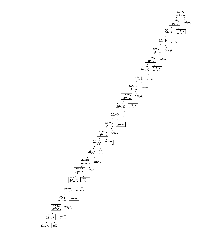

In [10]:
img = plt.imread('./tree1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=7)
x_train_fs = fs.fit_transform(x_train,y_train)
x_test_fs = fs.transform(x_test)
print(x_train.shape,x_train_fs.shape)

(64, 167) (64, 11)


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [12]:
dt.fit(x_train_fs,y_train)
dt.score(x_test_fs,y_test)

0.625

In [13]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree2.png")

True

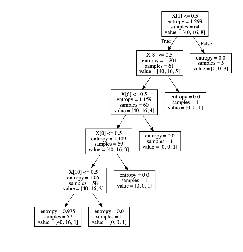

In [14]:
img = plt.imread('./tree2.png')
plt.imshow(img)
plt.axis('off')
plt.show()